In [ ]:
from Header import *
from GARCH_gil_jc import *

In [4]:
pars = [0.03,0.06,0.9]
nsamples = 500

In [52]:
method = 'jc'

if method == 'jc':
    
    # bounds and ranges JC
    bndsqml = ((0.01,0.99),(0.01,0.99),(0.01,0.99))
    bndsw = ((0.01,0.99),(0.01,0.99))
    bndsg = ((0.01,0.99),(0.01,0.99))
    bndsb = ((0.01,0.99),(0.01,0.99))
    bounds = [bndsqml,bndsw,bndsg,bndsb]

    ranges = [np.linspace(0.01,0.99,80).tolist()]*3
    
elif method == 'gil':
    
    # bounds and ranges Gil
    bndsqml = ((0.01, 0.5),(0.01, 0.5),(0.5, 0.99))
    bndsw = ((0.01, 0.5),(0.5, 0.99))
    bndsg = ((0.001, 0.5),(0.5, 0.99))
    bndsb = ((0.001, 0.5),(0.001, 0.5))
    bounds = [bndsqml,bndsw,bndsg,bndsb]

    rw = np.linspace(0.01,0.15,20)
    rg = np.linspace(0.01,0.15,20)
    rb = np.linspace(0.5, 0.95, 20)
    ranges = [rw,rg,rb]
    

In [53]:
%%time
%autoreload

ncpus = 8
nmc = 50
Nsamples = [5,10,15,20,50,75,100]#,150,200,300,400,500,1000]

# initialize
RES = {}; DF = {}
fittypes = ['qml','lpw','lpg','lpb']
for ft in fittypes:
    RES[ft] = []
    DF[ft] = []

# simulate over various sample sizes
for nsamples in Nsamples:
    print nsamples
    
    # monte carlo
    for i in range(nmc):
        print '\r',i+1,nmc,
    
        data = simulate_2(pars, sample_size=nsamples)

        qml,lpw,lpg,lpb = get_all_profiles(data,bounds,ranges,ncpus)

        RES['qml'].append(qml)
        RES['lpw'].append(lpw)
        RES['lpg'].append(lpg)
        RES['lpb'].append(lpb)
        
    # error metrics
    for ft in fittypes:
        df = np.sum([np.sum(((res-np.array(pars))/np.array(pars))**2) for res in RES[ft]])
        DF[ft].append(df)
        RES[ft] = []
    
    print

5
50 50                                                
10
50 50                                                
15
50 50                                                
20
50 50                                                
50
50 50                                                
75
50 50                                                
100
50 50                                                
Wall time: 30min 11s


In [54]:
# sort results
RES = pd.DataFrame()
for ft in fittypes:
    df = pd.DataFrame(DF[ft],columns=[ft],index=Nsamples)
    RES = pd.concat([RES,df],axis=1)

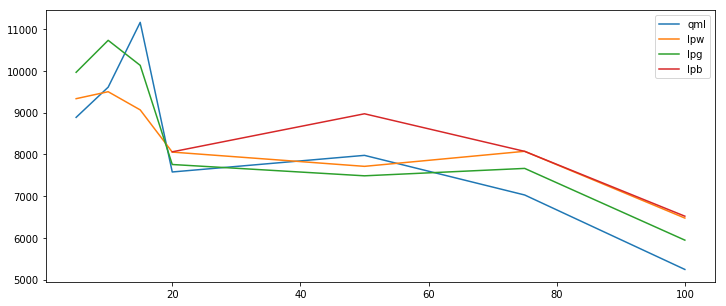

In [55]:
RES.plot(figsize=(12,5))

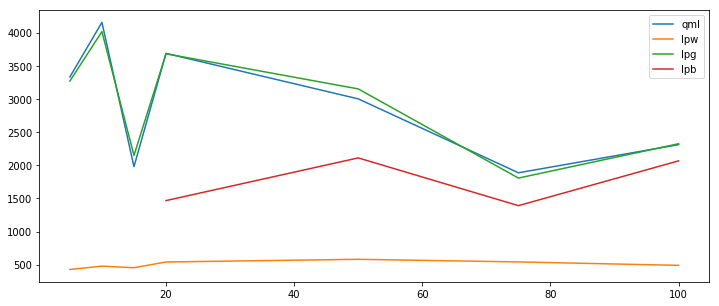

In [51]:
RES.plot(figsize=(12,5))

In [ ]:
RES.to_csv('../results/Error_Metrics_Final_%s.csv'%method,header=True)